# Credit Risk Loan Default Analysis (Probablity of Default) Project

##### 1. Introduction
##### 2. Data Loading & Initial Overview
##### 3. Data Cleaning
##### 4. Exploratory Data Analysis (EDA)
##### 5. Feature Engineering
##### 6. Model Training
##### 7. Model Evaluation
##### 8. Conclusion

# 1. Introduction

This notebook builds a predictive model for **Probability of Default (PD)** using a real-world loan credit dataset from Kaggle.

The aim is to:
- Analyze loan borrower characteristics (income, loan amount, credit history, etc.)
- Build Classification Models
- Predict whether a borrower will default on loan
- Along with Model Performance Metrics


# 2. Data Loading & Initial Overview

We begin by loading the dataset and exploring its structure.


In [1]:
# Import essential libraries for data manipulation, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [2]:
# Load the dataset
df = pd.read_csv('Datasets/credit_risk_dataset.csv')  # Read the credit risk dataset into a pandas DataFrame

# Preview the first few rows of the dataset
df.head()  # Display the first 5 rows to understand the structure and contents


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


# 3. Data Cleaning

We handle & manage data manipulation, if needed.

In [3]:
# View all column names in the dataset
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [4]:
# Check the dimensions of the dataset
df.shape  # Returns (rows, columns) to understand dataset size

(32581, 11)

In [5]:
# Rename columns for better readability and consistency
df.rename(columns={'person_age':'Age', 
                   'person_income':'Income', 
                   'person_home_ownership':'Home_Ownership_Status', 
                   'person_emp_length':'Employment_Length', 
                   'loan_intent':'Loan_Purpose', 
                   'loan_amnt':'Loan_Amount', 
                   'loan_int_rate':'Interest_Rate', 
                   'loan_status':'Loan_Status', 
                   'loan_percent_income':'Loan_Percent_Income', 
                   'cb_person_default_on_file':'Person_Ever_Defaulted', 
                   'cb_person_cred_hist_length':'Credit_History_length_Yrs'}, inplace=True)
df.head()

,Age,Income,Home_Ownership_Status,Employment_Length,Loan_Purpose,Loan_Amount,Interest_Rate,Loan_Status,Loan_Percent_Income,Person_Ever_Defaulted,Credit_History_length_Yrs
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [6]:
# Get a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        32581 non-null  int64  
 1   Income                     32581 non-null  int64  
 2   Home_Ownership_Status      32581 non-null  object 
 3   Employment_Length          31686 non-null  float64
 4   Loan_Purpose               32581 non-null  object 
 5   Loan_Amount                32581 non-null  int64  
 6   Interest_Rate              29465 non-null  float64
 7   Loan_Status                32581 non-null  int64  
 8   Loan_Percent_Income        32581 non-null  float64
 9   Person_Ever_Defaulted      32581 non-null  object 
 10  Credit_History_length_Yrs  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


In [7]:
# Generate descriptive statistics for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
Income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
Employment_Length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
Loan_Amount,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
Interest_Rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
Loan_Status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
Loan_Percent_Income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
Credit_History_length_Yrs,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


## 3.1. Checking for Duplicates

In [8]:
# Count the number of duplicate rows in the dataset
print(df.duplicated().sum())

165


In [9]:
# Check the count of duplicate(True) vs. unique rows(False)
df.duplicated().value_counts()

False    32416
True       165
Name: count, dtype: int64

In [10]:
# Display all duplicate rows in the dataset
df[df.duplicated()]

,Age,Income,Home_Ownership_Status,Employment_Length,Loan_Purpose,Loan_Amount,Interest_Rate,Loan_Status,Loan_Percent_Income,Person_Ever_Defaulted,Credit_History_length_Yrs
15975,23,42000,RENT,5.0,VENTURE,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,1000,10.37,0,0.03,N,16


In [11]:
# Shows all duplicate rows, not just the second occurrence
df[df.duplicated(keep=False)]

,Age,Income,Home_Ownership_Status,Employment_Length,Loan_Purpose,Loan_Amount,Interest_Rate,Loan_Status,Loan_Percent_Income,Person_Ever_Defaulted,Credit_History_length_Yrs
14,23,115000,RENT,2.0,EDUCATION,35000,7.90,0,0.30,N,4
238,22,183000,MORTGAGE,3.0,EDUCATION,1000,NaN,0,0.01,N,2
252,24,85000,RENT,5.0,MEDICAL,25000,10.62,0,0.29,N,4
591,26,20000,MORTGAGE,5.0,MEDICAL,4800,5.99,0,0.24,N,3
740,21,21600,OWN,NaN,VENTURE,7125,6.99,0,0.33,N,3
...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,1000,10.37,0,0.03,N,16


In [12]:
# Sorts by all columns to group exact duplicates together
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,Age,Income,Home_Ownership_Status,Employment_Length,Loan_Purpose,Loan_Amount,Interest_Rate,Loan_Status,Loan_Percent_Income,Person_Ever_Defaulted,Credit_History_length_Yrs
15944,21,8088,RENT,NaN,MEDICAL,1200,15.23,0,0.15,Y,2
16835,21,8088,RENT,NaN,MEDICAL,1200,15.23,0,0.15,Y,2
2431,21,15600,RENT,0.0,MEDICAL,2800,7.40,1,0.18,N,4
17758,21,15600,RENT,0.0,MEDICAL,2800,7.40,1,0.18,N,4
2498,21,18000,RENT,0.0,DEBTCONSOLIDATION,3000,7.90,1,0.17,N,2
...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,2500,5.42,0,0.06,N,12
29484,43,11340,RENT,4.0,EDUCATION,1950,NaN,1,0.17,N,11
32279,43,11340,RENT,4.0,EDUCATION,1950,NaN,1,0.17,N,11
31676,49,120000,MORTGAGE,12.0,MEDICAL,12000,10.99,0,0.10,N,12


In [13]:
# Remove duplicate rows and reset index for a clean dataset
df = df.drop_duplicates().reset_index(drop=True)
df

,Age,Income,Home_Ownership_Status,Employment_Length,Loan_Purpose,Loan_Amount,Interest_Rate,Loan_Status,Loan_Percent_Income,Person_Ever_Defaulted,Credit_History_length_Yrs
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32411,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32412,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32413,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32414,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


## 3.2. Treating Missing Values

Using Bucketing Judgement

In [14]:
# Check for missing values in each column, Returns the count of null (NaN) entries per feature 
df.isnull().sum()

Age                             0
Income                          0
Home_Ownership_Status           0
Employment_Length             887
Loan_Purpose                    0
Loan_Amount                     0
Interest_Rate                3095
Loan_Status                     0
Loan_Percent_Income             0
Person_Ever_Defaulted           0
Credit_History_length_Yrs       0
dtype: int64

### 3.2.1. For Interest Rate

In [15]:
# Step 1: Create loan amount buckets for grouping
def loan_bucket(amount):
    if pd.isnull(amount):
        return 'Unknown'
    elif amount <= 5000:
        return '0-5k'
    elif amount <= 10000:
        return '5k-10k'
    elif amount <= 15000:
        return '10k-15k'
    elif amount <= 20000:
        return '15k-20k'
    elif amount <= 30000:
        return '20k-30k'
    else:
        return '30k+'

df['loan_bucket'] = df['Loan_Amount'].apply(loan_bucket)   # Categorize each loan into a bucket based on its amount

# Step 2: Calculate average interest rate for each loan amount bucket
bucket_avg_interest = df.groupby('loan_bucket')['Interest_Rate'].mean()  # Compute mean interest rate per bucket
df['bucket_avg_interest'] = df['loan_bucket'].map(bucket_avg_interest)   # Map each row to its bucket's average

# Step 3: Impute missing interest rates using the bucket averages
def fill_interest(row):
    if pd.isnull(row['Interest_Rate']):
        # Fill with bucket average; fallback to overall mean if bucket is missing
        return bucket_avg_interest.get(row['loan_bucket'], df['Interest_Rate'].mean())      
    return row['Interest_Rate']

df['Interest_Rate'] = df.apply(fill_interest, axis=1)  # Apply custom logic to fill missing interest values

df.isnull().sum()  # Validate that 'Interest_Rate' is now filled

Age                            0
Income                         0
Home_Ownership_Status          0
Employment_Length            887
Loan_Purpose                   0
Loan_Amount                    0
Interest_Rate                  0
Loan_Status                    0
Loan_Percent_Income            0
Person_Ever_Defaulted          0
Credit_History_length_Yrs      0
loan_bucket                    0
bucket_avg_interest            0
dtype: int64

### 3.2.2. For Employement Length

In [16]:
# Step 1: Define income bucket function
def income_bucket(income):
    if pd.isnull(income):
        return 'Unknown'
    elif income <= 20000:
        return '0-20k'
    elif income <= 40000:
        return '20k-40k'
    elif income <= 60000:
        return '40k-60k'
    elif income <= 100000:
        return '60k-100k'
    else:
        return '100k+'

# Step 2: Create an income bucket column for grouping
df['income_bucket'] = df['Income'].apply(income_bucket)

# Step 3: Compute median employment length per income bucket
bucket_avg_employment = df.groupby('income_bucket')['Employment_Length'].median()
df['bucket_avg_employment'] = df['income_bucket'].map(bucket_avg_employment)

# Step 4: Fill missing Employment_Length values using income-based median
def fill_employment(row):
    if pd.isnull(row['Employment_Length']):
        # Use bucket-based median, fallback to overall median if bucket is missing
        return bucket_avg_employment.get(row['income_bucket'], df['Employment_Length'].median())   
    return row['Employment_Length']

df['Employment_Length'] = df.apply(fill_employment, axis=1)  # Apply imputation row-wise

df.isnull().sum() # Check for any remaining NaNs

Age                          0
Income                       0
Home_Ownership_Status        0
Employment_Length            0
Loan_Purpose                 0
Loan_Amount                  0
Interest_Rate                0
Loan_Status                  0
Loan_Percent_Income          0
Person_Ever_Defaulted        0
Credit_History_length_Yrs    0
loan_bucket                  0
bucket_avg_interest          0
income_bucket                0
bucket_avg_employment        0
dtype: int64

In [17]:
# Drop columns used for imputation
df.drop(['loan_bucket', 'bucket_avg_interest', 'income_bucket', 'bucket_avg_employment'], axis=1, inplace=True)
df

,Age,Income,Home_Ownership_Status,Employment_Length,Loan_Purpose,Loan_Amount,Interest_Rate,Loan_Status,Loan_Percent_Income,Person_Ever_Defaulted,Credit_History_length_Yrs
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32411,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32412,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32413,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32414,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


## 3.3. Treating Implausible outliers

In [18]:
# Identify and remove outliers in 'Age' feature

# Check how many rows have age greater than 70 (possible outliers)
print(df[df['Age']>70].shape)

# Print original dataset shape before filtering
print(df.shape)

# Remove rows where age is greater than 70 and reset the index
df = df[df['Age'] <= 70].reset_index(drop=True)
# Print the new shape after removing age outliers
df.shape

(13, 11)
(32416, 11)


(32403, 11)

In [19]:
# Handle outliers in 'Employment_Length' feature

# Check how many rows have Employment_Length greater than 60 years (unlikely in real-world data)
print(df[df['Employment_Length'] > 60].shape)
print(df.shape)

# Remove rows with Employment_Length > 60 years and reset index
df = df[df['Employment_Length'] <= 60].reset_index(drop=True)
df.shape

(2, 11)
(32403, 11)


(32401, 11)

# 4. Exploratory Data Analysis (EDA)

Visualize feature distributions and their relation.


## 4.1. Heatmap

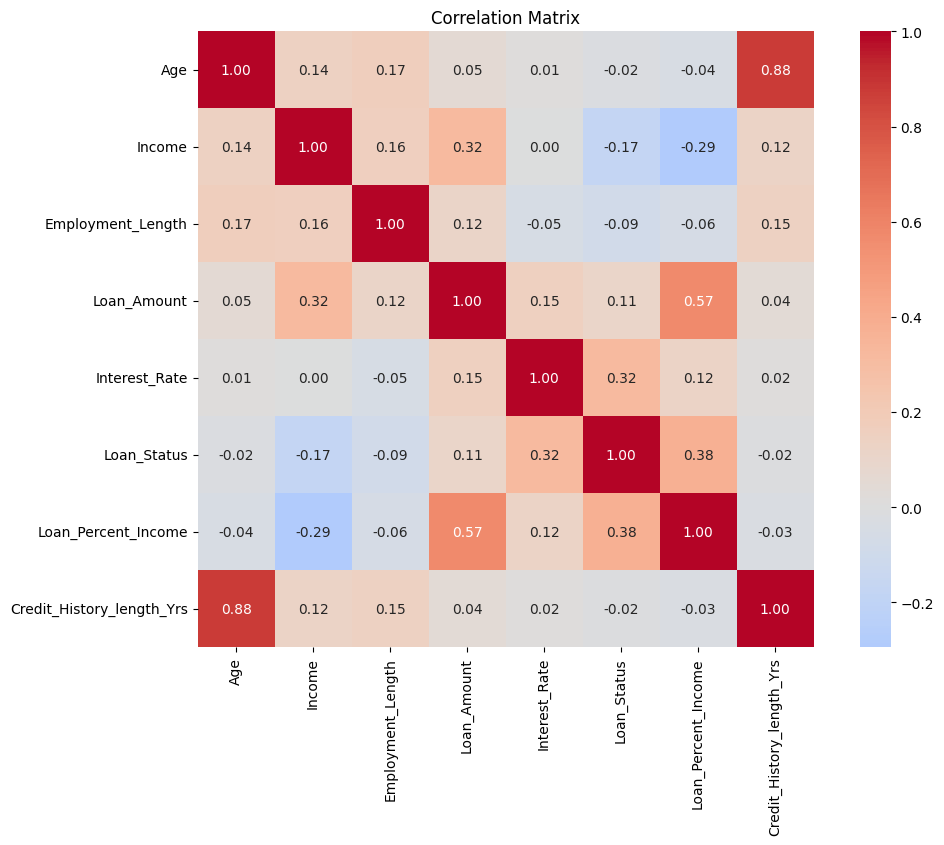

In [20]:
# Select only numerical columns
df_numeric = df.select_dtypes(include=['number'])

# Calculate correlation matrix (only numerical columns) with the target
corr_matrix = df_numeric.corr()

# Plot using seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)
plt.title("Correlation Matrix")
plt.show()

# 5. Feature Engineering

We encode categorical variables and create new features.


In [21]:
# For Class Imbalance
df['Loan_Status'].value_counts()

Loan_Status
0    25313
1     7088
Name: count, dtype: int64

## 5.1. Encoding Features

In [22]:
# Encode ordinal binary categorical feature: 'Person_Ever_Defaulted'
# Initialize the encoder
le = LabelEncoder()
df['Encoded_Person_Ever_Defaulted'] = le.fit_transform(df['Person_Ever_Defaulted'])
df

,Age,Income,Home_Ownership_Status,Employment_Length,Loan_Purpose,Loan_Amount,Interest_Rate,Loan_Status,Loan_Percent_Income,Person_Ever_Defaulted,Credit_History_length_Yrs,Encoded_Person_Ever_Defaulted
0,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,0
1,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,0
2,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2,0
3,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4,1
4,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32396,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30,0
32397,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19,0
32398,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28,0
32399,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26,0


In [23]:
# One-Hot Encode categorical variables with more than two categories(un-ordinal)
# Apply one-hot encoding to 'Home_Ownership_Status' and 'Loan_Purpose'
encoded_df = pd.get_dummies(df[['Home_Ownership_Status', 
                                'Loan_Purpose']], 
                                drop_first=True, dtype=int)  # dtype=int ensures encoded values are stored as integers (0 or 1)
encoded_df

,Home_Ownership_Status_OTHER,Home_Ownership_Status_OWN,Home_Ownership_Status_RENT,Loan_Purpose_EDUCATION,Loan_Purpose_HOMEIMPROVEMENT,Loan_Purpose_MEDICAL,Loan_Purpose_PERSONAL,Loan_Purpose_VENTURE
0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
32396,0,0,0,0,0,0,1,0
32397,0,0,0,0,0,0,1,0
32398,0,0,1,0,1,0,0,0
32399,0,0,0,0,0,0,1,0


In [24]:
# Merge one-hot encoded columns back into the main DataFrame
df = pd.concat([df, encoded_df], axis=1)
df

,Age,Income,Home_Ownership_Status,Employment_Length,Loan_Purpose,Loan_Amount,Interest_Rate,Loan_Status,Loan_Percent_Income,Person_Ever_Defaulted,Credit_History_length_Yrs,Encoded_Person_Ever_Defaulted,Home_Ownership_Status_OTHER,Home_Ownership_Status_OWN,Home_Ownership_Status_RENT,Loan_Purpose_EDUCATION,Loan_Purpose_HOMEIMPROVEMENT,Loan_Purpose_MEDICAL,Loan_Purpose_PERSONAL,Loan_Purpose_VENTURE
0,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,0,0,1,0,1,0,0,0,0
1,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,0,0,0,0,0,0,1,0,0
2,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2,0,0,0,1,0,0,1,0,0
3,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4,1,0,0,1,0,0,1,0,0
4,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32396,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30,0,0,0,0,0,0,0,1,0
32397,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19,0,0,0,0,0,0,0,1,0
32398,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28,0,0,0,1,0,1,0,0,0
32399,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26,0,0,0,0,0,0,0,1,0


In [25]:
df.shape

(32401, 20)

In [26]:
df_encoded_cols = df.drop(['Home_Ownership_Status', 'Loan_Purpose', 'Person_Ever_Defaulted'], axis=1)
df_encoded_cols

,Age,Income,Employment_Length,Loan_Amount,Interest_Rate,Loan_Status,Loan_Percent_Income,Credit_History_length_Yrs,Encoded_Person_Ever_Defaulted,Home_Ownership_Status_OTHER,Home_Ownership_Status_OWN,Home_Ownership_Status_RENT,Loan_Purpose_EDUCATION,Loan_Purpose_HOMEIMPROVEMENT,Loan_Purpose_MEDICAL,Loan_Purpose_PERSONAL,Loan_Purpose_VENTURE
0,21,9600,5.0,1000,11.14,0,0.10,2,0,0,1,0,1,0,0,0,0
1,25,9600,1.0,5500,12.87,1,0.57,3,0,0,0,0,0,0,1,0,0
2,23,65500,4.0,35000,15.23,1,0.53,2,0,0,0,1,0,0,1,0,0
3,24,54400,8.0,35000,14.27,1,0.55,4,1,0,0,1,0,0,1,0,0
4,21,9900,2.0,2500,7.14,1,0.25,2,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32396,57,53000,1.0,5800,13.16,0,0.11,30,0,0,0,0,0,0,0,1,0
32397,54,120000,4.0,17625,7.49,0,0.15,19,0,0,0,0,0,0,0,1,0
32398,65,76000,3.0,35000,10.99,1,0.46,28,0,0,0,1,0,1,0,0,0
32399,56,150000,5.0,15000,11.48,0,0.10,26,0,0,0,0,0,0,0,1,0


## 5.2. Splitting Data into Train & Test

In [27]:
# Define feature columns and target
X = df_encoded_cols.drop(columns=['Loan_Status'])  
y = df_encoded_cols['Loan_Status']  # Loan_Status is the target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)  # stratify=y maintains the class distribution in both sets

## 5.3. Scaling Features

In [28]:
# Dropping the columns that are not to be scaled
features_to_scale_train = X_train.drop(['Encoded_Person_Ever_Defaulted', 
                                        'Home_Ownership_Status_OTHER', 
                                        'Home_Ownership_Status_OWN', 
                                        'Home_Ownership_Status_RENT', 
                                        'Loan_Purpose_EDUCATION', 
                                        'Loan_Purpose_HOMEIMPROVEMENT', 
                                        'Loan_Purpose_MEDICAL', 
                                        'Loan_Purpose_PERSONAL', 
                                        'Loan_Purpose_VENTURE'], axis=1)
features_to_scale_test = X_test.drop(['Encoded_Person_Ever_Defaulted', 
                                      'Home_Ownership_Status_OTHER', 
                                      'Home_Ownership_Status_OWN', 
                                      'Home_Ownership_Status_RENT', 
                                      'Loan_Purpose_EDUCATION', 
                                      'Loan_Purpose_HOMEIMPROVEMENT', 
                                      'Loan_Purpose_MEDICAL', 
                                      'Loan_Purpose_PERSONAL', 
                                      'Loan_Purpose_VENTURE'], axis=1)

In [29]:
# Standardize feature values (mean = 0, std = 1) to improve model performance

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler only on the training data, then transform both sets
X_train_scaled = scaler.fit_transform(features_to_scale_train)  # Learn scaling parameters from training data
X_test_scaled = scaler.transform(features_to_scale_test)        # Apply same transformation to test data

# Convert scaled arrays back to DataFrames with original column names
X_train_scaled_ = pd.DataFrame(X_train_scaled, columns=features_to_scale_train.columns, index=features_to_scale_train.index)
X_test_scaled_ = pd.DataFrame(X_test_scaled, columns=features_to_scale_test.columns, index=features_to_scale_test.index)

In [30]:
# Get the dropped columns (the ones excluded from scaling)
dropped_columns_train = X_train[['Encoded_Person_Ever_Defaulted', 
                                 'Home_Ownership_Status_OTHER', 
                                 'Home_Ownership_Status_OWN', 
                                 'Home_Ownership_Status_RENT', 
                                 'Loan_Purpose_EDUCATION', 
                                 'Loan_Purpose_HOMEIMPROVEMENT', 
                                 'Loan_Purpose_MEDICAL', 
                                 'Loan_Purpose_PERSONAL', 
                                 'Loan_Purpose_VENTURE']]

dropped_columns_test = X_test[['Encoded_Person_Ever_Defaulted', 
                               'Home_Ownership_Status_OTHER', 
                               'Home_Ownership_Status_OWN', 
                               'Home_Ownership_Status_RENT', 
                               'Loan_Purpose_EDUCATION', 
                               'Loan_Purpose_HOMEIMPROVEMENT', 
                               'Loan_Purpose_MEDICAL', 
                               'Loan_Purpose_PERSONAL', 
                               'Loan_Purpose_VENTURE']]

# Concatenate scaled features + dropped (unscaled) features
X_train_scaled_df = pd.concat([X_train_scaled_, dropped_columns_train], axis=1)
X_test_scaled_df = pd.concat([X_test_scaled_, dropped_columns_test], axis=1)

In [31]:
X_train_scaled_df.shape

(25920, 16)

In [32]:
X_test_scaled_df.shape

(6481, 16)

## 5.4. Balancing data using SMOTE

In [33]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only on training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled_df, y_train)

# Check new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_balanced.value_counts())

Before SMOTE: Loan_Status
0    20250
1     5670
Name: count, dtype: int64
After SMOTE: Loan_Status
0    20250
1    20250
Name: count, dtype: int64


# 6. Model Training

Train Logistic Regression, Random Forest, and XGBoost models.


## 6.1. Logistic Regression

Logistic Regression Performance:

Accuracy: 0.7784292547446382
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.78      0.85      5063
           1       0.50      0.76      0.60      1418

    accuracy                           0.78      6481
   macro avg       0.71      0.77      0.72      6481
weighted avg       0.83      0.78      0.79      6481

Confusion Matrix:



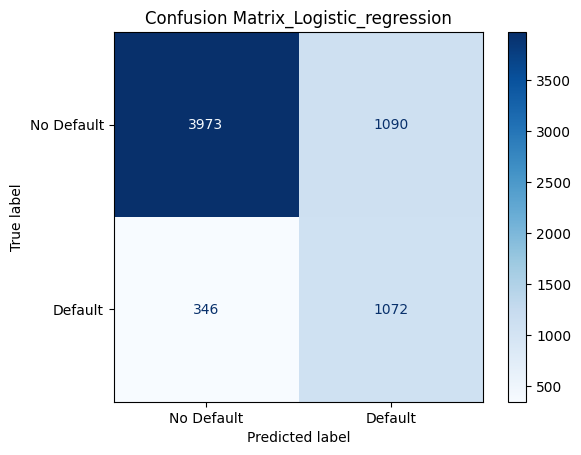

In [34]:
# 1. Initialize and train the model
log_model = LogisticRegression()
log_model.fit(X_train_balanced, y_train_balanced) # Train on SMOTE-balanced training data 

# 2. Predict on test data
y_pred_log = log_model.predict(X_test_scaled_df)

# 3. Evaluate
print("Logistic Regression Performance:")
print("\nAccuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# 4. Display the Confusion Matrix
print("Confusion Matrix:\n")
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(cm_log, display_labels=["No Default", "Default"])
disp_log.plot(cmap='Blues')
plt.title("Confusion Matrix_Logistic_regression")
plt.show()

## 6.2. Random Forest Classification

Random Forest Performance:

Accuracy: 0.9177596049992285
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      5063
           1       0.87      0.73      0.80      1418

    accuracy                           0.92      6481
   macro avg       0.90      0.85      0.87      6481
weighted avg       0.92      0.92      0.92      6481

Confusion Matrix:



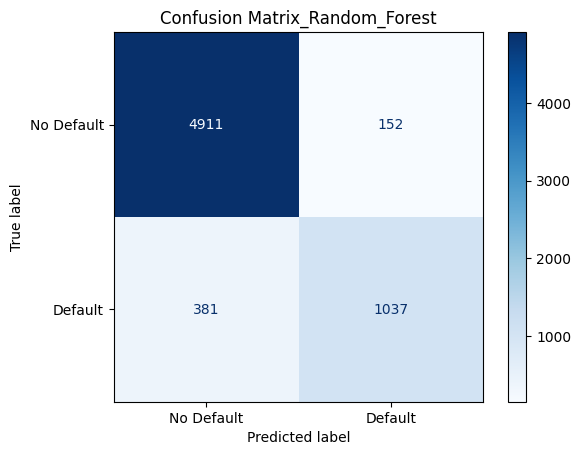

In [35]:
# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_balanced, y_train_balanced)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled_df)

# Evaluate
print("Random Forest Performance:")
print("\nAccuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Display the Confusion Matrix
print("Confusion Matrix:\n")
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(cm_rf, display_labels=["No Default", "Default"])
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix_Random_Forest")
plt.show()

## 6.3. XGBoost Classification

XGBoost Performance:

Accuracy: 0.9256287609936739
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      5063
           1       0.91      0.74      0.81      1418

    accuracy                           0.93      6481
   macro avg       0.92      0.86      0.88      6481
weighted avg       0.92      0.93      0.92      6481

Confusion Matrix:



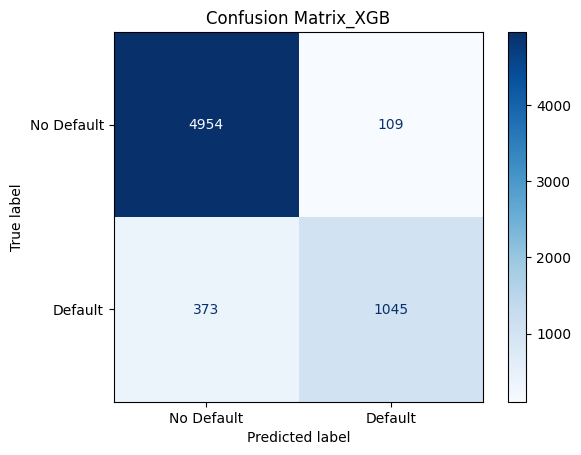

In [36]:
# Train XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train_balanced, y_train_balanced)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test_scaled_df)

# Evaluate
print("XGBoost Performance:")
print("\nAccuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Display the Confusion Matrix
print("Confusion Matrix:\n")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(cm_xgb, display_labels=["No Default", "Default"])
disp_xgb.plot(cmap='Blues')
plt.title("Confusion Matrix_XGB")
plt.show()

# 7. Model Evaluation

Evaluate models using classification metrics and ROC curves.


## 7.1. Comparison of Model Performances

In [37]:
# Collect all metrics
comparison_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Performance Comparison:\n")
comparison_df.round(3)


Model Performance Comparison:



,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.778,0.496,0.756,0.599
1,Random Forest,0.918,0.872,0.731,0.796
2,XGBoost,0.926,0.906,0.737,0.813


## 7.2. Feature Importance

### 7.2.1. Logistic Regression

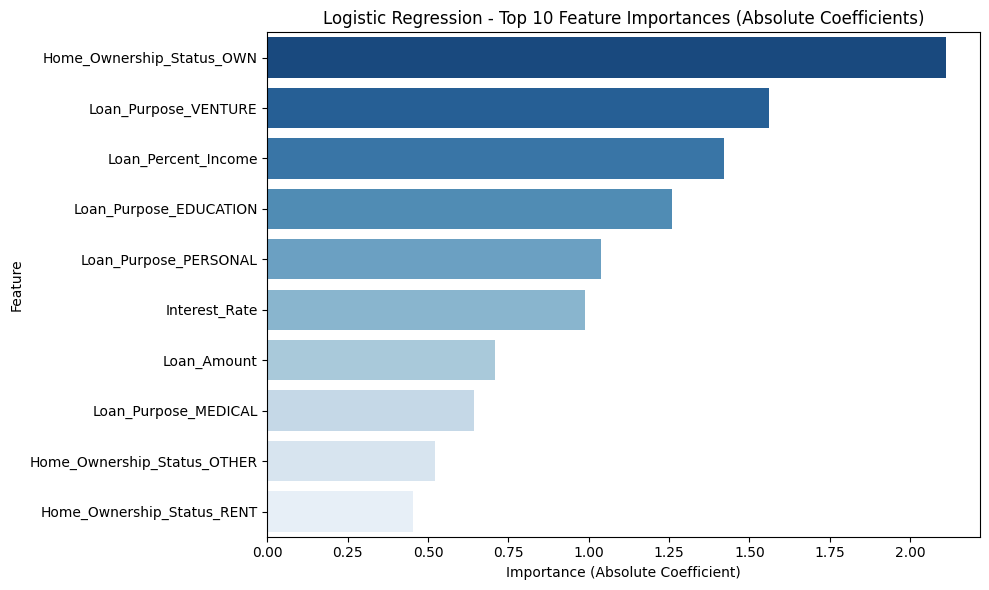

In [38]:
# Define feature names — ensure they match the order of model input
# Use column names from the scaled training DataFrame
feature_names = X_train_scaled_df.columns.tolist()

# Get feature importances (coefficients)
logreg_importance = pd.DataFrame({'log_imp':log_model.coef_[0]}, index=feature_names)
logreg_importance = logreg_importance.abs().sort_values(by='log_imp', ascending=False)

# Plot top 10 most influential features
plt.figure(figsize=(10, 6))
sns.barplot(x=logreg_importance['log_imp'][:10], y=logreg_importance.index[:10], hue=logreg_importance.index[:10], palette="Blues_r")
plt.title('Logistic Regression - Top 10 Feature Importances (Absolute Coefficients)')
plt.xlabel('Importance (Absolute Coefficient)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### 7.2.2. Random Forest Classification

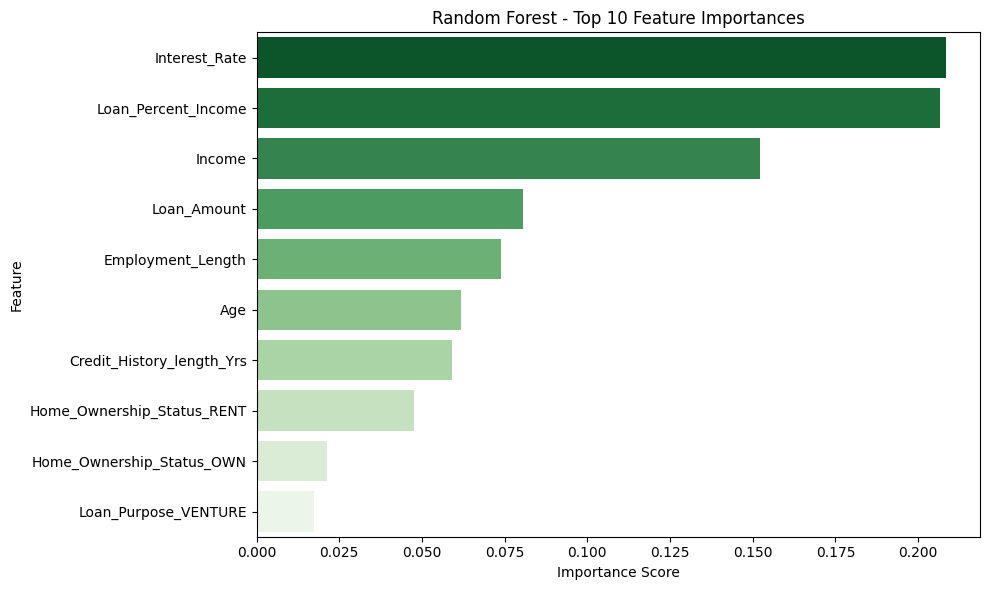

In [39]:
# Extract feature importances from the trained Random Forest model
rf_importance = pd.DataFrame({'rf_imp': rf_model.feature_importances_}, index=feature_names)
rf_importance = rf_importance.sort_values(by='rf_imp', ascending=False)

# Plot top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importance['rf_imp'][:10], y=rf_importance.index[:10], hue=rf_importance.index[:10], palette="Greens_r")
plt.title('Random Forest - Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### 7.2.3. XGBoost Classification

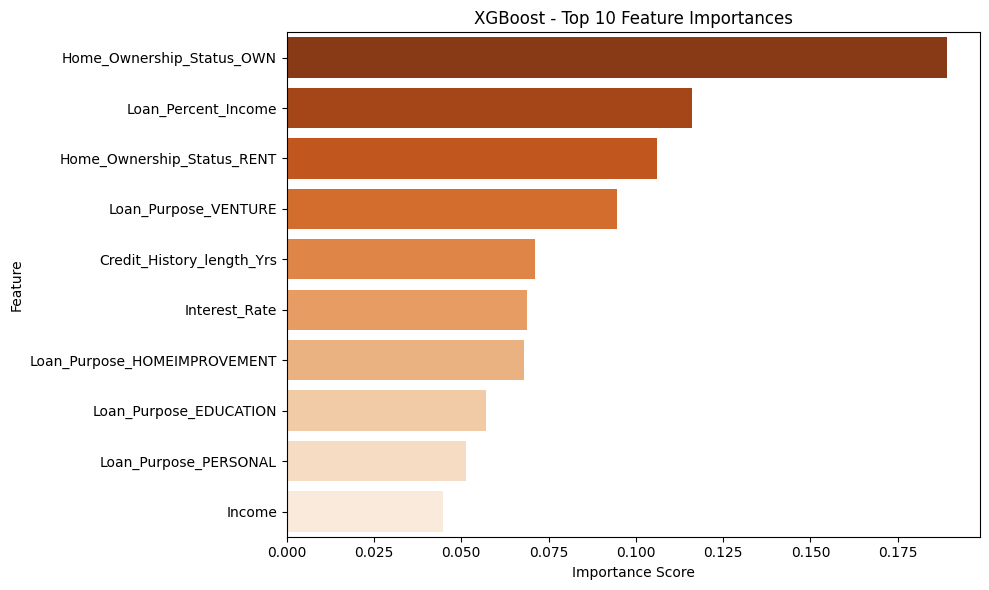

In [40]:
# Get feature importances
xgb_importance = pd.DataFrame({'xgb_imp': xgb_model.feature_importances_}, index=feature_names)
xgb_importance = xgb_importance.sort_values(by='xgb_imp', ascending=False)

# Plot top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importance['xgb_imp'][:10], y=xgb_importance.index[:10], hue=xgb_importance.index[:10], palette="Oranges_r")
plt.title('XGBoost - Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### 7.2.4. Combined Feature Importance for all Models

In [41]:
# Combine all into one DataFrame
combined_feature_importance = pd.concat([logreg_importance, rf_importance, xgb_importance], axis=1)

# Sort by average importance across all models
combined_feature_importance['Average'] = combined_feature_importance.mean(axis=1)
combined_feature_importance = combined_feature_importance.sort_values(by='Average', ascending=False)

# Display top 10 features
print("Top 10 Feature Importances Across Models:\n")
combined_feature_importance.head(10)

Top 10 Feature Importances Across Models:



,log_imp,rf_imp,xgb_imp,Average
Home_Ownership_Status_OWN,2.112314,0.021367,0.189136,0.774272
Loan_Percent_Income,1.420295,0.206648,0.116098,0.581014
Loan_Purpose_VENTURE,1.562649,0.017473,0.094574,0.558232
Loan_Purpose_EDUCATION,1.258078,0.015780,0.057077,0.443645
Interest_Rate,0.989210,0.208264,0.068877,0.422117
Loan_Purpose_PERSONAL,1.038292,0.012914,0.051323,0.367509
Loan_Amount,0.706866,0.080437,0.010338,0.265881
Loan_Purpose_MEDICAL,0.642036,0.008900,0.015737,0.222224
Home_Ownership_Status_RENT,0.452621,0.047725,0.106046,0.202131
Home_Ownership_Status_OTHER,0.522947,0.000417,0.009034,0.177466


## 7.3. Comparing ROC Curve & AUC

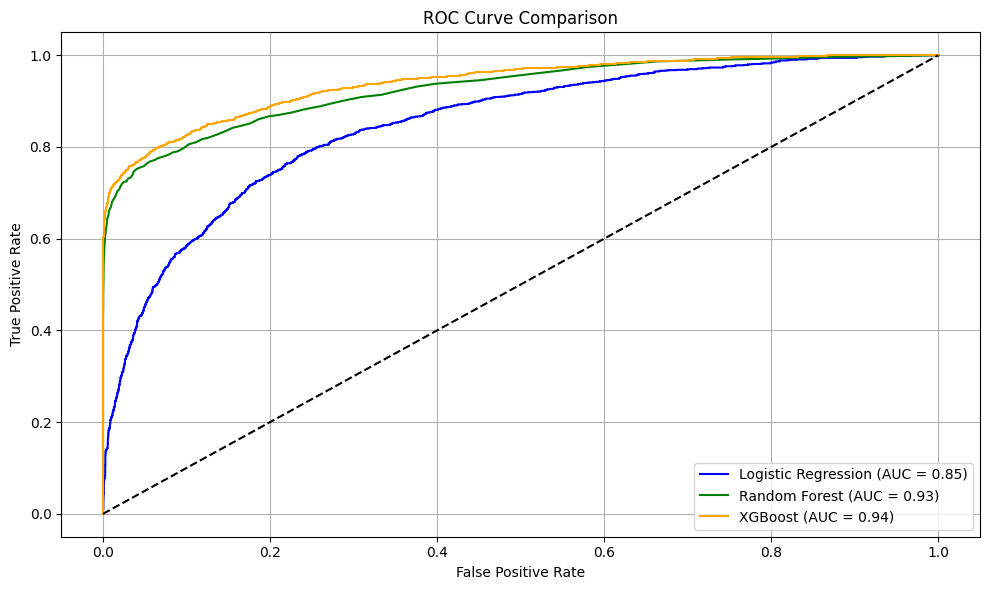

In [42]:
# Predict Probabilities for ROC-AUC Evaluation
# Get the predicted probabilities (needed for ROC) of the positive class (Default = 1)
y_prob_log = log_model.predict_proba(X_test_scaled_df)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test_scaled_df)[:, 1]
y_prob_xgb = xgb_model.predict_proba(X_test_scaled_df)[:, 1]

# Compute ROC curve (FPR vs TPR) and AUC for each
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

# AUC
auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})", color='blue')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color='green')
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})", color='orange')

plt.plot([0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# 8. Conclusion

- The XGBoost model performed best with a ROC-AUC of 0.94, and accuracy of 0.93. 
- Loan_Percent_Income, Interest_Rate, Home_Ownership_Status_OWN, and Loan_Amount were top predictors.
- Models Performed well, further hyperparameter tuning might help models improve accuracy.